<a href="https://colab.research.google.com/github/tazar09/heroes_3/blob/main/h3_castles%5Boct10%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [1]:
pip install adjusttext

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from adjustText import adjust_text

# Getting the data from the website

In [ ]:
list_of_castles = ['Castle', 'Rampart', 'Tower', 'Inferno', 'Necropolis', 'Dungeon', 'Stronghold', 'Fortress', 'Conflux']
url = 'https://heroes.thelazy.net/index.php/'

In [ ]:
url_castles = []
for x in list_of_castles:
  url_castles.append(url + x)
url_castles

['https://heroes.thelazy.net/index.php/Castle',
 'https://heroes.thelazy.net/index.php/Rampart',
 'https://heroes.thelazy.net/index.php/Tower',
 'https://heroes.thelazy.net/index.php/Inferno',
 'https://heroes.thelazy.net/index.php/Necropolis',
 'https://heroes.thelazy.net/index.php/Dungeon',
 'https://heroes.thelazy.net/index.php/Stronghold',
 'https://heroes.thelazy.net/index.php/Fortress',
 'https://heroes.thelazy.net/index.php/Conflux']

In [ ]:
dfs = []
for i, x in enumerate(url_castles):
  match_castle = str(list_of_castles[i]) + ' ' + 'creatures'
  df = pd.read_html(x, match = match_castle)
  dfs.append(df)

# Castles

1. Castle

In [ ]:
df_castle = pd.DataFrame(dfs[0][0])
df_castle.columns = df_castle.columns.droplevel()
df_castle['Town'] = 'Castle'

2. Rampart

In [ ]:
df_rampart = pd.DataFrame(dfs[1][0])
df_rampart.columns = df_rampart.columns.droplevel()
df_rampart['Town'] = 'Rampart'

3. Tower

In [ ]:
df_tower = pd.DataFrame(dfs[2][0])
df_tower.columns = df_tower.columns.droplevel()
df_tower['Town'] = 'Tower'

4. Inferno

In [ ]:
df_inferno = pd.DataFrame(dfs[3][0])
df_inferno.columns = df_inferno.columns.droplevel()
df_inferno['Town'] = 'Inferno'

5. Necropolis

In [ ]:
df_necropolis = pd.DataFrame(dfs[4][0])
df_necropolis.columns = df_necropolis.columns.droplevel()
df_necropolis['Town'] = 'Necropolis'

6. Dungeon

In [ ]:
df_dungeon = pd.DataFrame(dfs[5][0])
df_dungeon.columns = df_dungeon.columns.droplevel()
df_dungeon['Town'] = 'Dungeon'
# df_dungeon.drop('', axis = 1, inplace = True)

7. Stronghold

In [ ]:
url2 = 'https://heroes.thelazy.net/index.php/Stronghold'
df_stronghold = pd.read_html(url2, match = 'Fortress creatures')
df_stronghold = pd.DataFrame(df_stronghold[0])
df_stronghold.columns = df_stronghold.columns.droplevel()
df_stronghold['Town'] = 'Stronghold'

8. Fortress

In [ ]:
df_fortress = pd.DataFrame(dfs[7][0])
df_fortress.columns = df_fortress.columns.droplevel()
df_fortress['Town'] = 'Fortress'

9. Conflux

In [ ]:
df_conflux = pd.DataFrame(dfs[8][0])
df_conflux.columns = df_conflux.columns.droplevel()
df_conflux['Town'] = 'Conflux'

10. Cove

In [ ]:
url2 = 'https://heroes.thelazy.net/index.php/Cove'
df_cove = pd.read_html(url2, match = 'Cove creatures')
df_cove = pd.DataFrame(df_cove[0])
df_cove.columns = df_cove.columns.droplevel()
df_cove['Town'] = 'Cove'
df_cove.loc[6, 'Lvl'] = "3+"
#exclusion of first level 3 creature for uniformization
df_cove.drop(index = 4, axis = 0, inplace = True)
df_cove = df_cove.reset_index(drop = True)
df_cove.loc[4, 'Lvl'] = '3'
# df_cove.head(20)

# Generating cumsum column

Generating the column with cumulative Values for Upgraded Creatures.

In [ ]:
def cumsum(df):
  df['val_temp'] = df.index % 2 * df['Val']
  df['cum_val'] = df['val_temp'].cumsum()
  df = df.drop('val_temp', axis =1, inplace=True)
  return df

In [ ]:
for df in [df_castle, df_rampart, df_tower, df_inferno, df_necropolis, df_dungeon, df_stronghold, df_fortress, df_conflux, df_cove]:
  cumsum(df)

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Concatenation of castles

All castles joined

In [ ]:
df_towns = pd.concat([df_castle, df_rampart, df_tower, df_inferno, df_necropolis, df_dungeon, df_stronghold, df_fortress, df_conflux, df_cove] , axis = 0)

Preprocessing

In [ ]:
df_towns['Level'] = df_towns['Lvl'].str.replace('+', '.5').str.replace('*', '')
df_towns['Level'] = df_towns['Level'].astype(float)
df_towns.drop('Lvl', axis = 1, inplace = True)

In [ ]:
df = df_towns[['Name', 'Town', 'Level', 'Att', 'Def', 'D-', 'D+', 'HP', 'Spd', 'Grw', 'Val','cum_val','Cost', 'Unnamed: 12_level_1', 'Special']]
df['Unnamed: 12_level_1'] = df['Unnamed: 12_level_1'].fillna('0')
df['Special'] = df['Special'].fillna('No')
df = df.rename(columns={'Unnamed: 12_level_1':'Resource'})
df['Resource'] = df['Resource'].str.get(-1).astype(int)
df['Ranged'] = df['Special'].apply(lambda x:
                                   1 if 'Ranged' in x else
                                   0)
df['Flyer'] = df['Special'].apply(lambda x:
                                  1 if 'Fly' in x or 'Teleporting' in x or 'Teleport' in x else
                                  0)
df['no_retaliation'] = df['Special'].apply(lambda x:
                                           1 if 'No enemy retaliation' in x else
                                           (0.2 if any(s in x for s in ['Petrify', 'Paralyze']) else
                                           0))
df['Upgraded'] = df['Level'].apply(lambda x:
                                   1 if ((x / 0.5)%2 == 1) else
                                   0)

________________________________________________________________________________________________________________________________

# Checking for AI and Fight values

Adding AI value and Fight Value

In [ ]:
path_sod = '/content/h3_ai_value_sod.xlsx'
path_hoa = '/content/h3_ai_value_hoa.xlsx'

df_ai_value_sod = pd.read_excel(path_sod)
df_ai_value_hoa = pd.read_excel(path_hoa)

In [ ]:
df_ai_value_sod['Creature'] = df_ai_value_sod['Creature'].str.strip()
df_ai_value_hoa['Creature'] = df_ai_value_hoa['Creature'].str.strip()
df = df.merge(df_ai_value_hoa, how = 'left', left_on = 'Name', right_on = 'Creature')

In [ ]:
df.tail(5)

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Special,Ranged,Flyer,no_retaliation,Upgraded,dmg,attdef,Creature,AI Value,Fight Value
135,Sorceress,Cove,5.5,12,9,10,16,35,7,3,...,"Ranged (12 shots), Casts Weakness / Disrupting...",1,0,0.0,1,13.0,10.5,Sorceress,852,655
136,Nix,Cove,6.0,13,16,18,22,80,6,2,...,Ignores 30% of enemy attack value,0,0,0.0,0,20.0,14.5,Nix,1415,1415
137,Nix Warrior,Cove,6.5,14,17,18,22,90,7,2,...,Ignores 60% of enemy attack value,0,0,0.0,1,20.0,15.5,Nix Warrior,2116,1763
138,Sea Serpent,Cove,7.0,22,16,30,55,180,9,1,...,Poisonous,0,0,0.0,0,42.5,19.0,Sea Serpent,3953,3162
139,Haspid,Cove,7.5,29,20,30,55,300,12,1,...,"Poisonous, Revenge",0,0,0.0,1,42.5,24.5,Haspid,7220,5554


_________________________________________________________________________________________________________________

We used Horn of the Abyss Ai value and Fight Value, because Shadow of Death did not have records for Cove units. However, we displayed the differences in the following lines.

In [ ]:
df_merged = df_ai_value_sod.merge(df_ai_value_hoa, on = 'Creature', how = 'left')

In [ ]:
df_merged['AI_dif'] = df_merged['AI Value_y'] - df_merged['AI Value_x']
df_merged['Fight_dif'] = df_merged['Fight Value_y'] - df_merged['Fight Value_x']
df_diff = df_merged[(df_merged['AI_dif'] != 0) | (df_merged['Fight_dif'] != 0)].head(500)

In [ ]:
df_diff.head(20)

,Creature,AI Value_x,Fight Value_x,AI Value_y,Fight Value_y,AI_dif,Fight_dif
3,Faerie Dragon,19580,16317,30501,16317,10921,0
17,Firebird,4547,3248,4336,3097,-211,-151
30,Efreet Sultan,1848,1584,2343,1802,495,218
76,Monk,485,485,582,485,97,0
93,Nomad,345,285,345,415,0,130


In [ ]:
print('There were only {} differences. There where {} neutral creatures, and {} factions\' creatures. \nRegarding the towns\' changes, we note the {}, {} and {}.\nSo, we will keep the HoA scores.' \
      .format(df_diff.shape[0], df_diff.loc[[3,93]].shape[0], df_diff.loc[[17,30,76]].shape[0], df_diff.loc[17, 'Creature'], df_diff.loc[30, 'Creature'], df_diff.loc[76, 'Creature']))

There were only 5 differences. There where 2 neutral creatures, and 3 factions' creatures. 
Regarding the towns' changes, we note the Firebird, Efreet Sultan and Monk.
So, we will keep the HoA scores.


________________________________________________________________________________________________________

# Clean df - starting point

In [ ]:
df0 = df.drop(['Creature'], axis = 1)

In [ ]:
df0.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,dmg,attdef,AI Value,Fight Value
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,...,0,Immune to jousting,0,0,0.0,0,2.0,4.5,80,100
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,0,Immune to jousting,0,0,0.0,1,2.5,5.5,115,115
2,Archer,Castle,2.0,6,3,2,3,10,4,9,...,0,Ranged (12 shots),1,0,0.0,0,2.5,4.5,126,115
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,0,"Ranged (24 shots), Double attack",1,0,0.0,1,2.5,4.5,184,115
4,Griffin,Castle,3.0,8,8,3,6,25,6,7,...,0,"Flying, Two retaliations",0,1,0.0,0,4.5,8.0,351,324


In [ ]:
df = df0.copy()

End of first part: df0 is the starting dataframe

_____________


___________

__________________________________________________________________________________________________________________________________________________________

# Enhancing the df with new columns

PART II - Preprocessing and enhancing the data

Enhancing the data with special ability modelling: multiple attacks, magic immunity/resistance, spell casting etc.

1. Multiple attacks column

In [ ]:
df['multi_att'] = df['Special'].apply(lambda x:
                                      1 if 'Double attack' in x or 'Ferocity' in x else
                                      0.5 if 'all adjacent' in x else
                                      0.3 if any(item in x for item in ['Breath attack', '3-headed attack', 'Death blow', 'Unlimited', 'Fireball attack', 'Death cloud'])
                                      else 0)

Checking the results


In [ ]:
words = ['Double', 'Breath', 'Ferocity', 'adjacent', '3-headed', 'Death blow', 'Unlimited', 'Fireball attack', 'Death cloud']
pattern = '|'.join(words)
mask = df['Special'].str.contains(pattern)
# df[mask]

___________________________________________________________________________
2. Poisonous, aging, disease and similar effects.


In [ ]:
df['poison'] = df['Special'].apply(lambda x:
                                      1 if 'Poison' in x or 'Disease' in x or 'Aging' in x
                                      else 0)

Checking the results.

In [ ]:
words_poison = ['Poison', 'Disease', 'Aging']
pattern_poison = '|'.join(words_poison)
mask = df['Special'].str.contains(pattern_poison)
# df[mask]

___________________________________________________________________________
3. Immunity to some sort of spells.

In [ ]:
df['immunity'] = df['Special'].apply(lambda x:
                                     1 if ' Magic immunity' in x else
                                     0.75 if '1-4 lvl spells immunity' in x else
                                     0.5 if  '1-3 lvl spells immunity' in x else
                                     0.25 if 'Fire immunity' in x else
                                     0.10 if (any(item in x for item in ['Immunity to Mind spells', 'Elemental', 'Unliving', 'Undead']) & ('Magic immunity' not in x)) else
                                     0.03 if any(item in x for item in ['Immune to jousting', 'Immune to Blinding', 'Immune to ice'])
                                     else 0)

Checking the results

In [ ]:
words_immune = ['Immune', 'Immunity', 'immunity', 'Unliving', 'Undead']
pattern_immune = '|'.join(words_immune)
mask2 = df['Special'].str.contains(pattern_immune)
# df[mask2].head(5)

___________________________________________________________________________________________________
3. Magic resistance or spell eater.

In [ ]:
words_resistance = ['Resistance', 'resistance', 'resistant', 'Resists', 'resists', 'Magic damper', 'Mana drain', 'Spells cost -2 sp', 'Magic channel']
pattern_resistance = '|'.join(words_resistance)
mask_resistance = df['Special'].str.contains(pattern_resistance)
# df[mask_resistance]

In [ ]:
df['resistance'] = df['Special'].apply(lambda x:
                                      1 if any(s in x for s in ['Resistance', 'resistance', 'resistant',
                                                                'Resists', 'resists', 'Magic damper',
                                                                'Mana drain', 'Spells cost -2 sp', 'Magic channel'])
                                      else 0)

#must be revisited, not proper

Caster column

In [ ]:
words_caster = ['Cast', 'cast', 'Weakness', 'Dispel', 'Curse', 'Spellcaster', 'Resurrect', 'shield']
pattern_caster = '|'.join(words_caster)
mask_caster = df['Special'].str.contains(pattern_caster)
# df[mask_caster]

In [ ]:
df['caster'] = df['Special'].apply(lambda x: 1 if any(s in x for s in ['Cast', 'cast', 'Weakness', 'Dispel', 'Curse', 'Spellcaster', 'Resurrect', 'shield'])
                                              else 0)

Average damage, mean-att-def and percentage difference between AI and Fight values.

In [ ]:
df['dmg'] = (df['D+'] + df['D-'])/2
df['attdef'] = (df['Att'] + df['Def'])/2
df['diff_'] = round(((df['AI Value'] - df['Fight Value'])/df['Fight Value'])*100,0).astype(int)

Adding growth column with special buildings on each town that increases dwellings.

In [ ]:
df['Grw_full'] = (df['Grw'] * 2.0).astype(int)
df['Grw_special'] = 0

In [ ]:
#Castle
#Griffin Bastion
df.loc[4,'Grw_special'] = 3
df.loc[5,'Grw_special'] = 3

#Rampart
#Dendroid Saplings
df.loc[[22,23],'Grw_special'] = 2
#Miner's Guild
df.loc[[16,17],'Grw_special'] = 4

#Tower
#Sculptor's Wings
df.loc[[30,31],'Grw_special'] = 4

#Inferno
#Birthing pool
df.loc[[42,43],'Grw_special'] = 8
#Cages
df.loc[[46,47],'Grw_special'] = 3

#Necropolis
#Unearthed graves
df.loc[[56,57], 'Grw_special'] = 6

#Dungeon
#Mushroom rings
df.loc[[70,71], 'Grw_special'] = 7

#Stronghold
#Mess hall
df.loc[[84,85], 'Grw_special'] = 8

#Fortress
#Captain quarters
df.loc[[98,99], 'Grw_special'] = 6

#Conflux
#Garden of life
df.loc[[112,113], 'Grw_special'] = 10
#we ignore Vault of Ashes in HoA which gives +1 Phoenix. We consider it OP.

#Cove
#Pub
df.loc[[128,129], 'Grw_special'] = 4
#Roost
df.loc[[132,133], 'Grw_special'] = 3


df['Grw_total'] = df['Grw_full'] + df['Grw_special']

In [ ]:
df.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Fight Value,multi_att,poison,immunity,resistance,caster,diff_,Grw_full,Grw_special,Grw_total
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,...,100,0.0,0,0.03,0,0,-20,28,0,28
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,115,0.0,0,0.03,0,0,0,28,0,28
2,Archer,Castle,2.0,6,3,2,3,10,4,9,...,115,0.0,0,0.00,0,0,10,18,0,18
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,115,1.0,0,0.00,0,0,60,18,0,18
4,Griffin,Castle,3.0,8,8,3,6,25,6,7,...,324,0.0,0,0.00,0,0,8,14,3,17


Intermediate dataframe with calculation for growth.

In [ ]:
df_growth = df[['Name','Town', 'Level', 'Grw','Grw_full', 'Grw_special', 'Grw_total']]
df_growth.head()

,Name,Town,Level,Grw,Grw_full,Grw_special,Grw_total
0,Pikeman,Castle,1.0,14,28,0,28
1,Halberdier,Castle,1.5,14,28,0,28
2,Archer,Castle,2.0,9,18,0,18
3,Marksman,Castle,2.5,9,18,0,18
4,Griffin,Castle,3.0,7,14,3,17


In [ ]:
df = df[['Name', 'Town', 'Level', 'Att', 'Def', 'D-', 'D+', 'HP', 'Spd', 'Grw',
       'Val', 'cum_val', 'Cost', 'Resource', 'Special', 'Ranged', 'Flyer',
       'no_retaliation', 'Upgraded', 'AI Value', 'Fight Value', 'diff_', 'multi_att',
       'poison', 'immunity', 'resistance', 'caster', 'dmg', 'attdef', 'Grw_total']]

In [ ]:
df.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Fight Value,diff_,multi_att,poison,immunity,resistance,caster,dmg,attdef,Grw_total
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,...,100,-20,0.0,0,0.03,0,0,2.0,4.5,28
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,115,0,0.0,0,0.03,0,0,2.5,5.5,28
2,Archer,Castle,2.0,6,3,2,3,10,4,9,...,115,10,0.0,0,0.00,0,0,2.5,4.5,18
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,115,60,1.0,0,0.00,0,0,2.5,4.5,18
4,Griffin,Castle,3.0,8,8,3,6,25,6,7,...,324,8,0.0,0,0.00,0,0,4.5,8.0,17


# Exporting and importing csv

In [4]:
df = pd.read_csv('/content/df_h3.csv')

# EDA and testing area

## Speed analysis

We only use the upgraded creatures from now on.

In [ ]:
df_upg = df[df['Upgraded'] == 1]

1st, 2nd and 3rd fastest

In [ ]:
castle_list_2max = list(df_upg['Town'].unique())

spd_list_2max = []

for name in castle_list_2max:
  speed_2min = df_upg[df_upg['Town'] == name]['Spd'].sort_values(ascending = False).iloc[1]
  spd_list_2max.append(speed_2min)

In [4]:
df_2max = pd.DataFrame({'Town': castle_list_2max, '2max': spd_list_2max})
df_2max

In [ ]:
castle_list_3max = list(df_upg['Town'].unique())

spd_list_3max = []

for name in castle_list_3max:
  speed_2max = df_upg[df_upg['Town'] == name]['Spd'].sort_values(ascending = False).iloc[2]
  spd_list_3max.append(speed_2max)

In [ ]:
df_3max = pd.DataFrame({'Town1': castle_list_3max, '3max': spd_list_3max})
df_3max

In [ ]:
df_top3_speed = pd.concat([df_2max, df_3max], axis = 1)
df_top3_speed.drop('Town1', axis = 1, inplace = True)
df_top3_speed = df_top3_speed.set_index('Town')

Overall speed analysis

In [116]:
df_spd = pd.concat([merge, df_top3_speed], axis=1)

In [117]:
df_spd = df_spd[['min', 'mean','max', '2max', '3max']]
df_spd['mean'] = round(df_spd['mean'],1)

In [118]:
df_spd.columns = ['min', 'mean', '1st', '2nd', '3rd',]

In [119]:
df_spd['first3'] = round(df_spd[['1st', '2nd', '3rd']].mean(axis=1),1)
df_spd['first3_std'] = round(df_spd[['1st', '2nd', '3rd']].std(axis=1),1)

In [120]:
df_spd['mean_diff'] = round(((df_spd['first3'] - df_spd['mean'])/df_spd['mean'])*100,1)

In [121]:
df_spd.sort_values('first3', ascending = False).head(10)

,min,mean,1st,2nd,3rd,first3,first3_std,mean_diff
Town,,,,,,,,
Conflux,6,9.6,21,9,9,13.0,6.9,35.4
Inferno,6,9.1,17,13,8,12.7,4.5,39.6
Rampart,4,8.7,16,12,9,12.3,3.5,41.4
Castle,5,8.6,18,9,9,12.0,5.2,39.5
Dungeon,5,8.7,15,11,9,11.7,3.1,34.5
Necropolis,4,7.9,14,9,9,10.7,2.9,35.4
Fortress,5,7.7,13,11,7,10.3,3.1,33.8
Tower,5,7.9,11,11,9,10.3,1.2,30.4
Cove,6,8.4,12,11,8,10.3,2.1,22.6


In [ ]:
fortress_speed_mean = df_upg.groupby('Town')['Spd'].mean().sort_values(ascending = False)
fortress_speed_max = df_upg.groupby('Town')['Spd'].max().sort_values(ascending = False)
fortress_speed_min = df_upg.groupby('Town')['Spd'].min().sort_values(ascending = False)
merge = pd.concat([fortress_speed_mean,fortress_speed_max, fortress_speed_min], axis=1, names = ['mean', 'max', 'min'])
merge.columns = ['mean', 'max', 'min']
# merge.reset_index(inplace = True)

In [ ]:
merge = merge.sort_values(by = 'mean', ascending = True)
merge.head(10)

In [138]:
first3_scatter = list(df_spd['first3'])

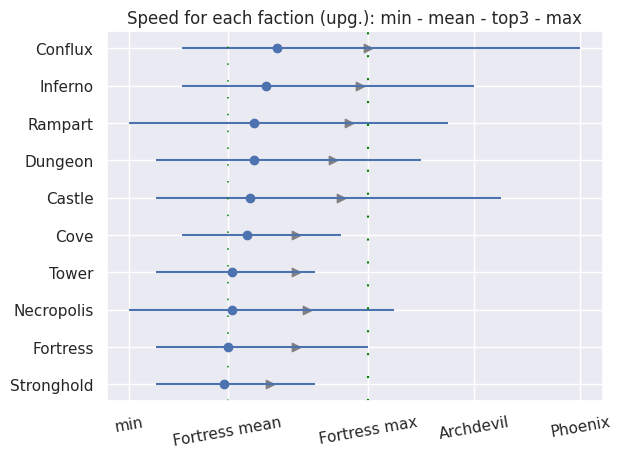

In [157]:
plt.errorbar(y = merge.index, x = merge['mean'], xerr = [merge['mean'] - merge['min'], merge['max'] - merge['mean']], fmt = 'o', )
plt.title('Speed for each faction (upg.): min - mean - top3 - max')
plt.axvline(x=7.71, color='green', linestyle= (0, (1, 10)), linewidth=1.1)
plt.axvline(x=13, color='green', linestyle=(0, (1, 10)), linewidth=1.5)
plt.xticks([4, 7.71, 13, 17, 21], labels = ['min', 'Fortress mean', 'Fortress max', 'Archdevil', 'Phoenix'], rotation = 10)

plt.scatter(x = first3_scatter,
            y = merge.index,
            marker=">",
            color='grey')

plt.show()

## Ranged value

In [ ]:
df_ranged = df_upg[['Name', 'Town', 'AI Value', 'Fight Value', 'Ranged', 'Grw_total', 'Upgraded']]
df_ranged = df_ranged[df_ranged['Upgraded'] == 1]

In [199]:
df_ranged.head()

,Name,Town,AI Value,Fight Value,Ranged,Grw_total,Upgraded,ranged_value
1,Halberdier,Castle,115,115,0,28,1,0
3,Marksman,Castle,184,115,1,18,1,3312
5,Royal Griffin,Castle,448,364,0,17,1,0
7,Crusader,Castle,588,588,0,8,1,0
9,Zealot,Castle,750,500,1,6,1,4500


In [197]:
df_ranged['ranged_value'] = df_ranged['AI Value'] * df_ranged['Grw_total'] * df_ranged['Ranged']

In [201]:
df_ranged.groupby('Town')['ranged_value'].sum().sort_values(ascending = False)

Town
Tower         22552
Cove          13540
Conflux       10392
Dungeon        9754
Stronghold     9132
Castle         7812
Necropolis     6474
Rampart        4634
Inferno        3840
Fortress       2808
Name: ranged_value, dtype: int64

## Flyer value

In [227]:
df_flyer= df_upg[['Name', 'Town', 'AI Value', 'Fight Value', 'Flyer', 'Grw_total', 'Upgraded']]
df_flyer = df_flyer[df_flyer['Upgraded'] == 1]

In [228]:
df_flyer.head()

,Name,Town,AI Value,Fight Value,Flyer,Grw_total,Upgraded
1,Halberdier,Castle,115,115,0,28,1
3,Marksman,Castle,184,115,0,18,1
5,Royal Griffin,Castle,448,364,1,17,1
7,Crusader,Castle,588,588,0,8,1
9,Zealot,Castle,750,500,0,6,1


In [238]:
df_flyer['flyer_value'] = df_flyer['AI Value'] * df_flyer['Grw_total'] * df_flyer['Flyer']
df_flyer['flyer_value_fight'] = df_flyer['Fight Value'] * df_flyer['Grw_total'] * df_flyer['Flyer']

In [239]:
df_flyer.head()

,Name,Town,AI Value,Fight Value,Flyer,Grw_total,Upgraded,flyer_value,flyer_value_fight
1,Halberdier,Castle,115,115,0,28,1,0,0
3,Marksman,Castle,184,115,0,18,1,0,0
5,Royal Griffin,Castle,448,364,1,17,1,7616,6188
7,Crusader,Castle,588,588,0,8,1,0,0
9,Zealot,Castle,750,500,0,6,1,0,0


In [240]:
df_flyer.groupby('Town')['flyer_value'].sum().sort_values(ascending = False)

Town
Conflux       36334
Dungeon       27606
Castle        25168
Inferno       23602
Rampart       22546
Necropolis    20066
Fortress      11064
Tower         10074
Cove           9495
Stronghold     6636
Name: flyer_value, dtype: int64

## Damage

### Damage variation

In [321]:
df_dmg = df_upg[['Name', 'Town', 'D-', 'D+', 'Grw_total']]

In [322]:
df_dmg['dmg_avg'] = (df_dmg['D+'] + df_dmg['D-']) /2
df_dmg['dmg_avg_total'] = df_dmg['dmg_avg'] * df_dmg['Grw_total']
df_dmg['dmg+_total'] = df_dmg['D+'] * df_dmg['Grw_total']
df_dmg['dmg_range_total'] = round(df_dmg['dmg+_total'] - df_dmg['dmg_avg_total'])
df_dmg['dmg_perc_range_per_unit'] = round(((df_dmg['D+'] - df_dmg['dmg_avg'])/ df_dmg['dmg_avg']),2)    *100

In [337]:
df_dmg[(df_dmg['Town'] == 'Conflux') | (df_dmg['Town'] == 'Castle')]

,Name,Town,D-,D+,Grw_total,dmg_avg,dmg_avg_total,dmg+_total,dmg_range_total,dmg_perc_range_per_unit
1,Halberdier,Castle,2,3,28,2.5,70.0,84,14.0,20.0
3,Marksman,Castle,2,3,18,2.5,45.0,54,9.0,20.0
5,Royal Griffin,Castle,3,6,17,4.5,76.5,102,26.0,33.0
7,Crusader,Castle,7,10,8,8.5,68.0,80,12.0,18.0
9,Zealot,Castle,10,12,6,11.0,66.0,72,6.0,9.0
11,Champion,Castle,20,25,4,22.5,90.0,100,10.0,11.0
13,Archangel,Castle,50,50,2,50.0,100.0,100,0.0,0.0
113,Sprite,Conflux,1,3,50,2.0,100.0,150,50.0,50.0
115,Storm Elemental,Conflux,2,8,12,5.0,60.0,96,36.0,60.0
117,Ice Elemental,Conflux,3,7,12,5.0,60.0,84,24.0,40.0


In [329]:
df_dmg[(df_dmg['Name'] == 'Lizard Warrior') | (df_dmg['Name'] == 'Storm Elemental')]

,Name,Town,D-,D+,Grw_total,dmg_avg,dmg_avg_total,dmg+_total,dmg_range_total,dmg_perc_range_per_unit
101,Lizard Warrior,Fortress,2,5,18,3.5,63.0,90,27.0,43.0
115,Storm Elemental,Conflux,2,8,12,5.0,60.0,96,36.0,60.0


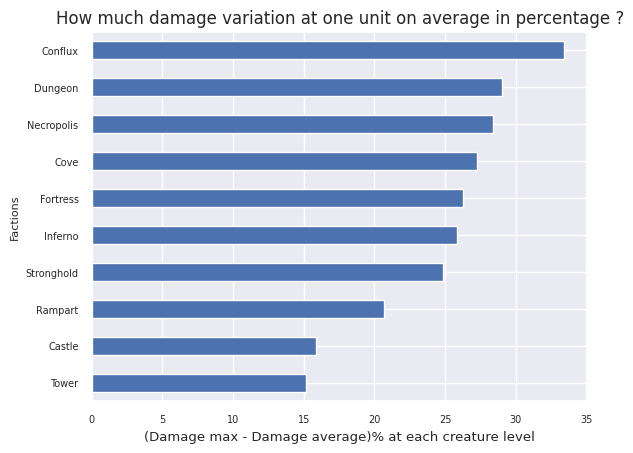

In [354]:
df_dmg.groupby('Town')['dmg_perc_range_per_unit'].mean().sort_values(ascending=True).plot(kind = 'barh' ,fontsize = 7)
plt.xlabel("(Damage max - Damage average)% at each creature level", fontsize=9.5)
plt.ylabel("Factions", fontsize=8)
plt.title('How much damage variation at one unit on average in percentage ?')
plt.show()

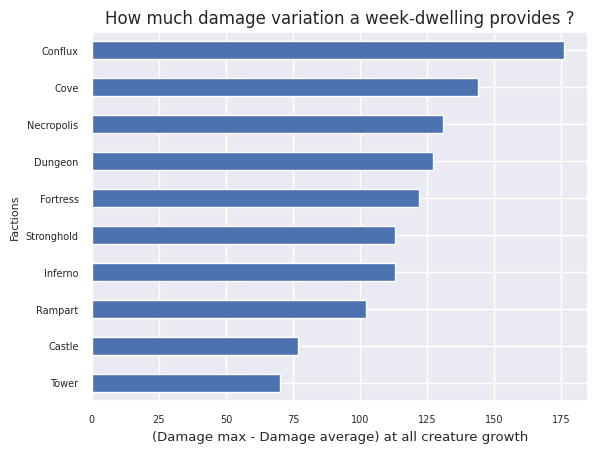

In [350]:
df_dmg.groupby('Town')['dmg_range_total'].sum().sort_values(ascending=True).plot(kind = 'barh' ,fontsize = 7)
plt.xlabel("(Damage max - Damage average) at all creature growth", fontsize=9.5)
plt.ylabel("Factions", fontsize=8)
plt.title('How much damage variation a week-dwelling provides ?')
plt.show()

### Damage output

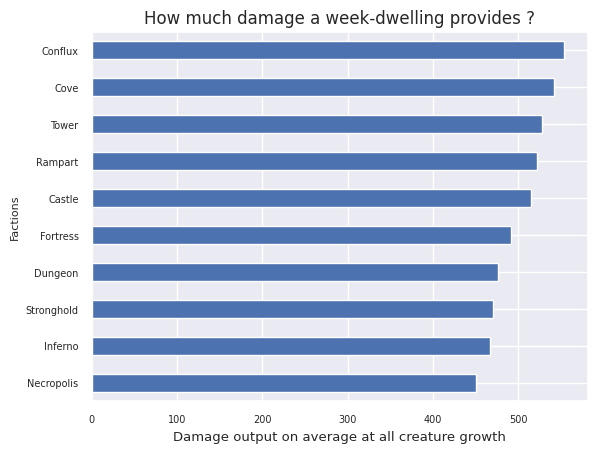

In [346]:
df_dmg.groupby('Town')['dmg_avg_total'].sum().sort_values(ascending=True).plot(kind = 'barh', fontsize = 7)
plt.xlabel("Damage output on average at all creature growth", fontsize=9.5)
plt.ylabel("Factions", fontsize=8)
plt.title('How much damage a week-dwelling provides ?')
plt.show()

## Defence

## Attack

## Specialities

# Factions analysis

## Fortress

Fortress is a town that focuses on defence and armorer. We expect an above-average defence potential which synergizes very well with armorer specialist heroes.

Fortress also has the advantage of cheap development costs, and good early game creatures. We should expect very cost-efficient units and an early game speed and stats bonus.

There are also a lot of specialities among the creature stack, which should allow for maneaveuring in the battle to compensate for low quality combat stats.

This town creature stack is a bit slow and and the damage output has a lot of variation. We should find that haste and bless are the most beneficial spells for a Fortress hero.

In [124]:
df_upg[df_upg['Town'] == 'Fortress']

,Unnamed: 0,Name,Town,Level,Att,Def,D-,D+,HP,Spd,...,resistance,caster,dmg,attdef,Grw_total,total_avalue,total_fvalue,total_avalue_cost,total_fvalue_cost,range_fly
99,99,Gnoll Marauder,Fortress,1.5,4,6,2,3,6,5,...,0,0,2.5,5.0,30,2700,2700,39.0,39.0,0
101,101,Lizard Warrior,Fortress,2.5,6,8,2,5,15,5,...,0,0,3.5,7.0,18,2808,2340,20.0,17.0,1
103,103,Dragon Fly,Fortress,3.5,8,10,2,5,20,13,...,0,1,3.5,9.0,16,4992,4000,21.0,17.0,1
105,105,Greater Basilisk,Fortress,4.5,12,12,6,10,40,7,...,0,0,8.0,12.0,8,5712,4488,14.0,11.0,0
107,107,Mighty Gorgon,Fortress,5.5,11,16,12,16,70,6,...,0,0,14.0,13.5,6,6168,6168,10.0,10.0,0
109,109,Wyvern Monarch,Fortress,6.5,14,14,18,22,70,11,...,0,0,20.0,14.0,4,6072,6072,6.0,6.0,1
111,111,Chaos Hydra,Fortress,7.5,18,20,25,45,250,7,...,0,0,35.0,19.0,2,11862,10544,3.0,3.0,0


Speed

In [125]:
fortress_speed_mean = df_upg.groupby('Town')['Spd'].mean().sort_values(ascending = False)
fortress_speed_max = df_upg.groupby('Town')['Spd'].max().sort_values(ascending = False)
fortress_speed_min = df_upg.groupby('Town')['Spd'].min().sort_values(ascending = False)
merge = pd.concat([fortress_speed_mean,fortress_speed_max, fortress_speed_min], axis=1, names = ['mean', 'max', 'min'])
merge.columns = ['mean', 'max', 'min']
# merge.reset_index(inplace = True)

In [ ]:
merge = merge.sort_values(by = 'mean', ascending = True)
merge.head(10)

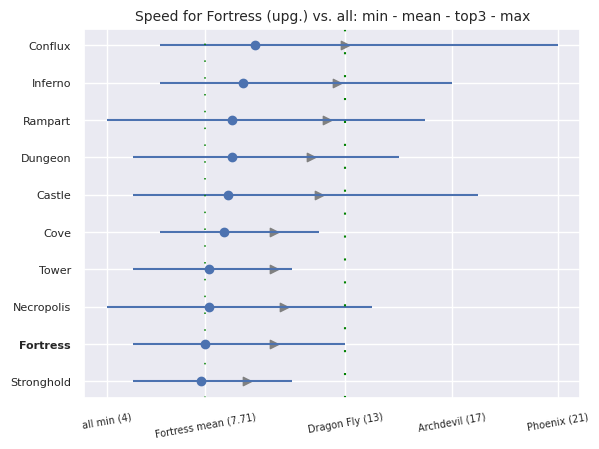

In [225]:
plt.errorbar(y = merge.index, x = merge['mean'], xerr = [merge['mean'] - merge['min'], merge['max'] - merge['mean']], fmt = 'o', )
plt.title('Speed for Fortress (upg.) vs. all: min - mean - top3 - max', fontsize = 10)
plt.axvline(x=7.71, color='green', linestyle= (0, (1, 10)), linewidth=1.1)
plt.axvline(x=13, color='green', linestyle=(0, (1, 10)), linewidth=1.5)
plt.xticks([4, 7.71, 13, 17, 21], labels = ['all min (4)', 'Fortress mean (7.71)', 'Dragon Fly (13)', 'Archdevil (17)', 'Phoenix (21)'], fontsize = 7, rotation = 10)
plt.yticks(ticks = merge.index, fontsize = 8)



plt.scatter(x = first3_scatter,
            y = merge.index,
            marker=">",
            color='grey')

ax = plt.gca()
for tick in ax.get_yticklabels():
    if tick.get_text() == 'Fortress':
        tick.set_weight('bold')

plt.show()

Fortress is the second slowest faction by average speed of its upgraded creatures, superior only to the other neutral faction, Stronghold.

When considering the fastest unit, Dragon Fly ranks the Fortress on the 4th lowest position in maximum speed section, with a speed of 13. You will only move first when fighting against Cove, Stronghold or Tower, or by fighting in swamp battlefield with Necropolis.

Your fastest 3 units ranks the 4th lowest when considering their mean. However, this trio is headed by two fragile fliers and a 7-speed unit. You will suffer heavily in this area, considering that you will ALWAYS have to attack the enemy because of lowest value in archery.

Tactics is very important to Fortress heroes, but Witches almost never get it (only 1 percent chance). Beastmasters have a higher probability with 6 percent chance of getting the skill.

While the 2nd fastest creature of Fortress is rather swift (Wyvern M., 11), It ranks last on the 3rd fastest unit, with only 7 speed for G. Basilisk. So you will most likely move 2nd with the Flies, then with Wyverns, and then you will have a break until your Basilisks and Hydras enter into play.

Considering the fragility of your first two flier units, you will probabily not attack and wait until your grunts can make a move. Your best hand-to-hand units are very slow, with Gorgons having 6-speed and Hydras 7-speed.

Naturally Haste spell is very usefull for Fortress units, the faction having 53 percent chances of getting it in the Magic Guild. Keep in mind that even with Expert Tactics, the Gorgons are not able to strike immediately.

One more thing to consider is the speed of you best player, the Gorgon. Judging by its opponents, this unit is very slow, meaning that chances it gets negative magic is very high. If you don't protect you Gorgons, your chances to kill your opponent level 7 creatures decreases.

The result of the battle hinges on your ability to efficiently fight with Gorgons against the level 7 units and use the Hydras multi-attack and no retaliation. They are both slow, 2-hexes, non-flyer, non-ranged but define your strategy. One way of efficiently using their abilities is by having the Teleport spell in your book. Fortunately, Fortress gets a 40 percent change of learning Teleport, but Water Magic rarely comes to its heroes.

A Cove Navigator with great chances for Water Magic and Offence synergizes very well with Fortress's setup.



In [203]:
df_spd.sort_values('mean', ascending = False).head(10)

,min,mean,1st,2nd,3rd,first3,first3_std,mean_diff
Town,,,,,,,,
Conflux,6,9.6,21,9,9,13.0,6.9,35.4
Inferno,6,9.1,17,13,8,12.7,4.5,39.6
Dungeon,5,8.7,15,11,9,11.7,3.1,34.5
Rampart,4,8.7,16,12,9,12.3,3.5,41.4
Castle,5,8.6,18,9,9,12.0,5.2,39.5
Cove,6,8.4,12,11,8,10.3,2.1,22.6
Necropolis,4,7.9,14,9,9,10.7,2.9,35.4
Tower,5,7.9,11,11,9,10.3,1.2,30.4
Fortress,5,7.7,13,11,7,10.3,3.1,33.8


Ranged value

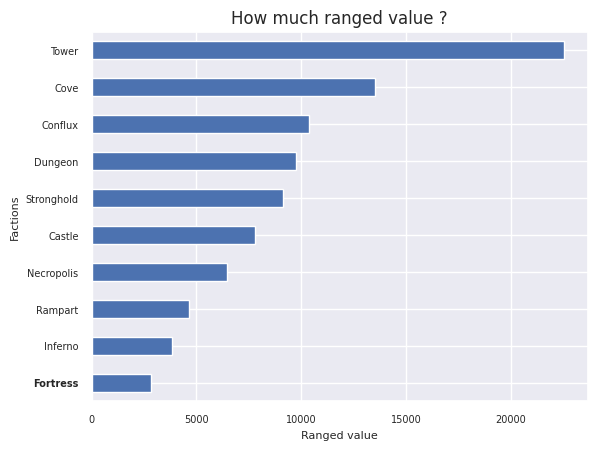

In [223]:
df_ranged.groupby('Town')['ranged_value'].sum().sort_values(ascending = True).plot(kind = 'barh', fontsize = 7)
plt.xlabel("Ranged value", fontsize=8)
plt.ylabel("Factions", fontsize=8)
plt.title('How much ranged value ?')

ax = plt.gca()
for tick in ax.get_yticklabels():
  if tick.get_text() == 'Fortress':
    tick.set_weight('bold')

Judging by the previous plot, you can see why you have to attack. Having only one weak archer forces you to cross the battlefield. Unfortunately this is made harder by your slow units and inefficient fliers. Since magic won't be on your side almost every time, your heavily depend on Tactics, Haste and Teleport.

Water magic (with Dispel and Cure) becomes even more important since if you get Mass Slow, the game is pretty much over.

Flyer value

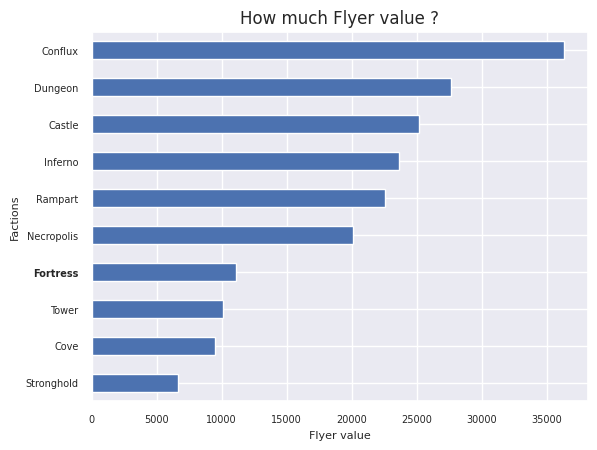

In [242]:
df_flyer.groupby('Town')['flyer_value'].sum().sort_values(ascending = True).plot(kind = 'barh', fontsize = 7)
plt.xlabel("Flyer value", fontsize=8)
plt.ylabel("Factions", fontsize=8)
plt.title('How much Flyer value ?')

ax = plt.gca()
for tick in ax.get_yticklabels():
  if tick.get_text() == 'Fortress':
    tick.set_weight('bold')

As you can, mobility is a problem even when considering Flyers value. Fortress ranks among the lowest with only Dragon Flies and the Monarchs.

Only three Factions are rated lower, but compensate by being the best in the range area. Fortress is the only one with both weak rangers and flyers. Tower and Cove will have no rush to cross walls or battlefields with such a powerful ranged lineup. Stronghold has more options with his range and wall-demolition level-6 creature.

This implies the necessity for tactical tricks in order to be able to get a fair fight.


In [386]:
df_upg.head()

,Unnamed: 0,Name,Town,Level,Att,Def,D-,D+,HP,Spd,...,resistance,caster,dmg,attdef,Grw_total,total_avalue,total_fvalue,total_avalue_cost,total_fvalue_cost,range_fly
1,1,Halberdier,Castle,1.5,6,5,2,3,10,5,...,0,0,2.5,5.5,28,3220,3220,43.0,43.0,0
3,3,Marksman,Castle,2.5,6,3,2,3,10,6,...,0,0,2.5,4.5,18,3312,2070,22.0,14.0,1
5,5,Royal Griffin,Castle,3.5,9,9,3,6,25,9,...,0,0,4.5,9.0,17,7616,6188,32.0,26.0,1
7,7,Crusader,Castle,4.5,12,12,7,10,35,6,...,0,0,8.5,12.0,8,4704,4704,12.0,12.0,0
9,9,Zealot,Castle,5.5,12,10,10,12,30,7,...,0,0,11.0,11.0,6,4500,3000,10.0,7.0,1


In [392]:
df_grunts = df_upg[['Town', 'Name', 'range_fly', 'AI Value', 'Grw_total']]


,Town,Name,range_fly,AI Value,Grw_total
1,Castle,Halberdier,0,115,28
3,Castle,Marksman,1,184,18
5,Castle,Royal Griffin,1,448,17
7,Castle,Crusader,0,588,8
9,Castle,Zealot,1,750,6


In [419]:
df_grunts['range_fly']= (df_grunts['range_fly'] -1)
df_grunts['range_fly'] = -1 * df_grunts['range_fly']

In [420]:
df_grunts.head()

,Town,Name,range_fly,AI Value,Grw_total,grunt_value
1,Castle,Halberdier,1,115,28,0
3,Castle,Marksman,0,184,18,3312
5,Castle,Royal Griffin,0,448,17,7616
7,Castle,Crusader,1,588,8,0
9,Castle,Zealot,0,750,6,4500


In [421]:
df_grunts['grunt_value'] = df_grunts['AI Value'] * df_grunts['Grw_total'] * df_grunts['range_fly']
df_grunts.head()

,Town,Name,range_fly,AI Value,Grw_total,grunt_value
1,Castle,Halberdier,1,115,28,3220
3,Castle,Marksman,0,184,18,0
5,Castle,Royal Griffin,0,448,17,0
7,Castle,Crusader,1,588,8,4704
9,Castle,Zealot,0,750,6,0


<Axes: ylabel='Town'>

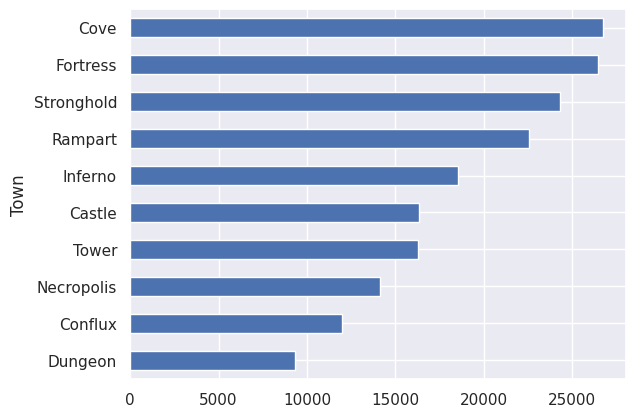

In [444]:
df_grunts.groupby('Town')['grunt_value'].sum().sort_values(ascending = True).plot(kind='barh')

In [430]:
df_flyer_concat = df_flyer.groupby('Town')['flyer_value'].sum()
df_ranged_concat= df_ranged.groupby('Town')['ranged_value'].sum()
df_grunts_concat = df_grunts.groupby('Town')['grunt_value'].sum()
df_speed_concat = df_upg.groupby('Town')['Spd'].mean().sort_values(ascending = False)

In [447]:
df_regplot = pd.concat([df_ranged_concat, df_flyer_concat, df_grunts_concat, df_speed_concat], axis =1)
df_regplot = df_regplot.reset_index()
df_regplot

,Town,ranged_value,flyer_value,grunt_value,Spd
0,Castle,7812,25168,16324,8.571429
1,Conflux,10392,36334,11968,9.571429
2,Cove,13540,9495,26732,8.428571
3,Dungeon,9754,27606,9348,8.714286
4,Fortress,2808,11064,26442,7.714286
5,Inferno,3840,23602,18560,9.142857
6,Necropolis,6474,20066,14126,7.857143
7,Rampart,4634,22546,22588,8.714286
8,Stronghold,9132,6636,24330,7.571429
9,Tower,22552,10074,16304,7.857143


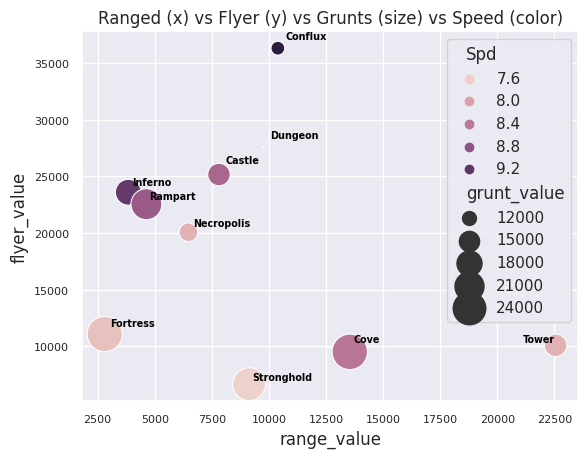

In [455]:
sns.scatterplot(data=df_regplot, x = 'ranged_value', y= 'flyer_value', size = 'grunt_value', sizes= (1,650), hue = 'Spd', legend="auto")

text_objects = []

for line in range(0,df_regplot.shape[0]):
     text_objects.append(plt.text(df_regplot.ranged_value[line] + 1, df_regplot.flyer_value[line] + 1, df_regplot.Town[line],
              horizontalalignment='left',
              verticalalignment='top',
              size='xx-small',
              color='black',
              weight='semibold'))
     adjust_text(text_objects)

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.xlabel("range_value")
plt.ylabel("flyer_value")
plt.title('Ranged (x) vs Flyer (y) vs Grunts (size) vs Speed (color)')
plt.show()

# plt.axhline(y=avg_price, color="red", ls= ":", lw = 0.5)
# plt.axvline(x=avg_val, color="red", linestyle=":", lw = 0.5)

Defence

<Axes: ylabel='Town'>

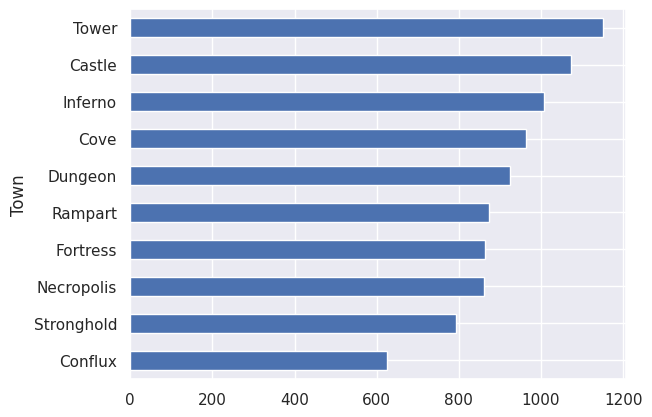

In [224]:
df[(df['Upgraded'] == 1) & (df['Level'] < 8)].groupby('Town')['Cost'].mean().sort_values(ascending = True).plot(kind = 'barh')

In [20]:
df.columns

Index(['Unnamed: 0', 'Name', 'Town', 'Level', 'Att', 'Def', 'D-', 'D+', 'HP',
       'Spd', 'Grw', 'Val', 'cum_val', 'Cost', 'Resource', 'Special', 'Ranged',
       'Flyer', 'no_retaliation', 'Upgraded', 'AI Value', 'Fight Value',
       'diff_', 'multi_att', 'poison', 'immunity', 'resistance', 'caster',
       'dmg', 'attdef', 'Grw_total', 'total_avalue', 'total_fvalue',
       'total_avalue_cost', 'total_fvalue_cost', 'range_fly'],
      dtype='object')

In [21]:
df['total_avalue'] = df['Val'] * df['Grw_total']
df['total_fvalue'] = df['Fight Value'] * df['Grw_total']
df.head()

,Unnamed: 0,Name,Town,Level,Att,Def,D-,D+,HP,Spd,...,resistance,caster,dmg,attdef,Grw_total,total_avalue,total_fvalue,total_avalue_cost,total_fvalue_cost,range_fly
0,0,Pikeman,Castle,1.0,4,5,1,3,10,4,...,0,0,2.0,4.5,28,2240,2800,37.0,47.0,0
1,1,Halberdier,Castle,1.5,6,5,2,3,10,5,...,0,0,2.5,5.5,28,3220,3220,43.0,43.0,0
2,2,Archer,Castle,2.0,6,3,2,3,10,4,...,0,0,2.5,4.5,18,2268,2070,23.0,21.0,1
3,3,Marksman,Castle,2.5,6,3,2,3,10,6,...,0,0,2.5,4.5,18,3312,2070,22.0,14.0,1
4,4,Griffin,Castle,3.0,8,8,3,6,25,6,...,0,0,4.5,8.0,17,5967,5508,30.0,28.0,1


<Axes: ylabel='Town'>

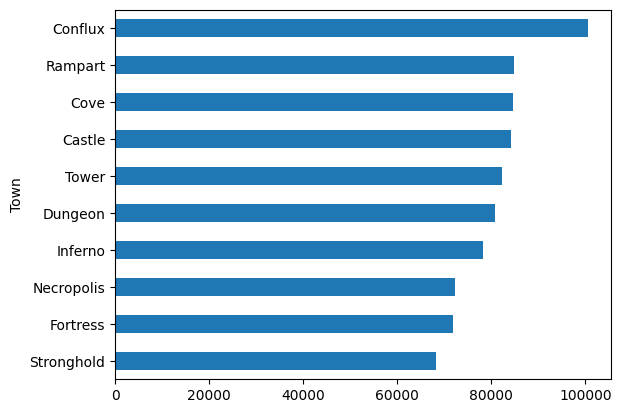

In [22]:
df.groupby('Town')['total_avalue'].sum().sort_values(ascending = True).plot(kind = 'barh')

In [23]:
df['total_avalue_cost'] = round(   (df['AI Value'] / df['Cost'])     * df['Grw_total']      ,0)
df['total_fvalue_cost'] = round(   (df['Fight Value'] / df['Cost'])     *df['Grw_total']      ,0)
df.head()

,Unnamed: 0,Name,Town,Level,Att,Def,D-,D+,HP,Spd,...,resistance,caster,dmg,attdef,Grw_total,total_avalue,total_fvalue,total_avalue_cost,total_fvalue_cost,range_fly
0,0,Pikeman,Castle,1.0,4,5,1,3,10,4,...,0,0,2.0,4.5,28,2240,2800,37.0,47.0,0
1,1,Halberdier,Castle,1.5,6,5,2,3,10,5,...,0,0,2.5,5.5,28,3220,3220,43.0,43.0,0
2,2,Archer,Castle,2.0,6,3,2,3,10,4,...,0,0,2.5,4.5,18,2268,2070,23.0,21.0,1
3,3,Marksman,Castle,2.5,6,3,2,3,10,6,...,0,0,2.5,4.5,18,3312,2070,22.0,14.0,1
4,4,Griffin,Castle,3.0,8,8,3,6,25,6,...,0,0,4.5,8.0,17,5967,5508,30.0,28.0,1


<Axes: ylabel='Town'>

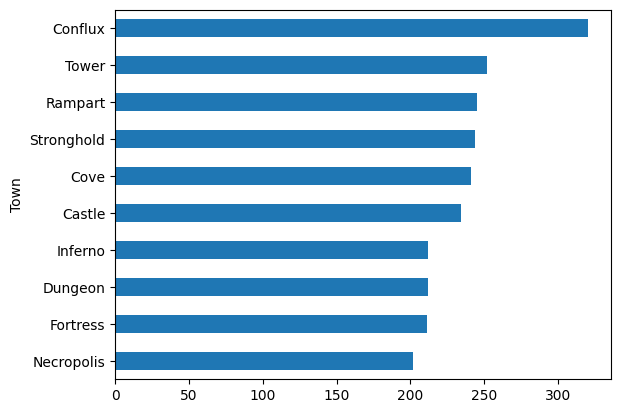

In [24]:
df.groupby('Town')['total_fvalue_cost'].sum().sort_values(ascending = True).plot(kind = 'barh')

<Axes: ylabel='Town'>

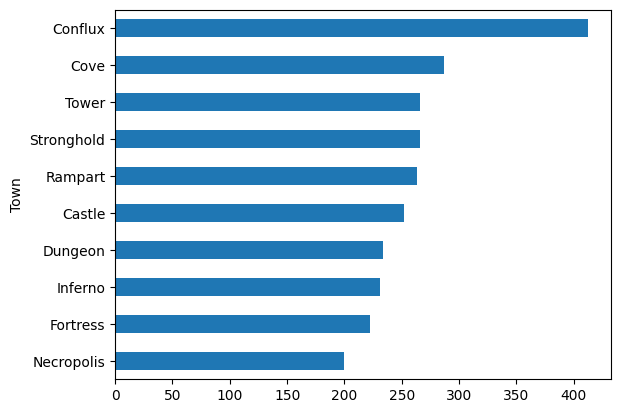

In [25]:
df.groupby('Town')['total_avalue_cost'].sum().sort_values(ascending = True).plot(kind = 'barh')

Show me the castles with the highest percentange change between AI Value and Fight Value.

<Axes: title={'center': 'Overall difference between AI and Fight Value per town'}, ylabel='Town'>

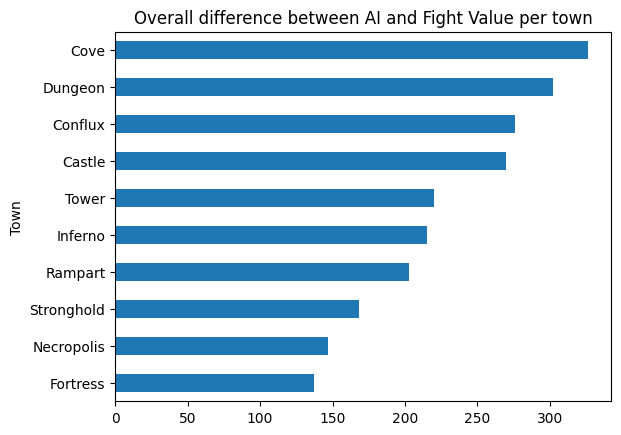

In [26]:
df.groupby('Town')['diff_'].sum().sort_values(ascending = True).plot(kind = 'barh', title = 'Overall difference between AI and Fight Value per town')

Text(0.5, 1.0, 'Correlation matrix')

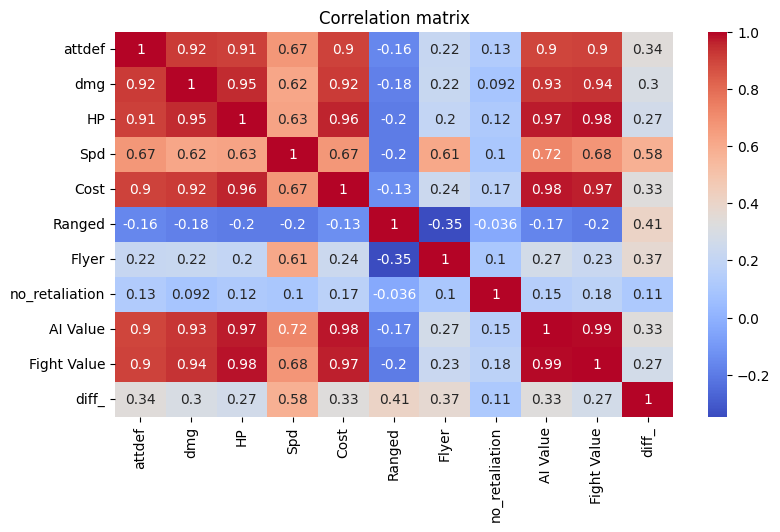

In [27]:
dfa = df[['Name', 'attdef', 'dmg', 'HP', 'Spd', 'Cost', 'Ranged', 'Flyer',
       'no_retaliation', 'AI Value', 'Fight Value', 'diff_']]
corr_matrix = dfa.corr(method = 'pearson')
plt.figure(figsize = (9, 5))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation matrix')

We can see that Speed, Ranged and Flyer are the most important in explaining the difference between AI value and Fight Value. Hope this will be shown in the linear regression.

In [28]:
df['range_fly'] = df['Flyer'] + df['Ranged']
dftest = df.copy()

In [29]:
df.head()

,Unnamed: 0,Name,Town,Level,Att,Def,D-,D+,HP,Spd,...,resistance,caster,dmg,attdef,Grw_total,total_avalue,total_fvalue,total_avalue_cost,total_fvalue_cost,range_fly
0,0,Pikeman,Castle,1.0,4,5,1,3,10,4,...,0,0,2.0,4.5,28,2240,2800,37.0,47.0,0
1,1,Halberdier,Castle,1.5,6,5,2,3,10,5,...,0,0,2.5,5.5,28,3220,3220,43.0,43.0,0
2,2,Archer,Castle,2.0,6,3,2,3,10,4,...,0,0,2.5,4.5,18,2268,2070,23.0,21.0,1
3,3,Marksman,Castle,2.5,6,3,2,3,10,6,...,0,0,2.5,4.5,18,3312,2070,22.0,14.0,1
4,4,Griffin,Castle,3.0,8,8,3,6,25,6,...,0,0,4.5,8.0,17,5967,5508,30.0,28.0,1


In [30]:
n = 3.5
m = 7
p = 7.5
dftest2 = dftest[dftest['Level'] == n].reset_index(drop = True)
dftest2 = dftest2.rename(columns={'Fight Value': 'Fight_Value'})
avg_price = dftest2[dftest2['Level'] == n].Cost.mean()
avg_val = dftest2[dftest2['Level'] == n].Val.mean()

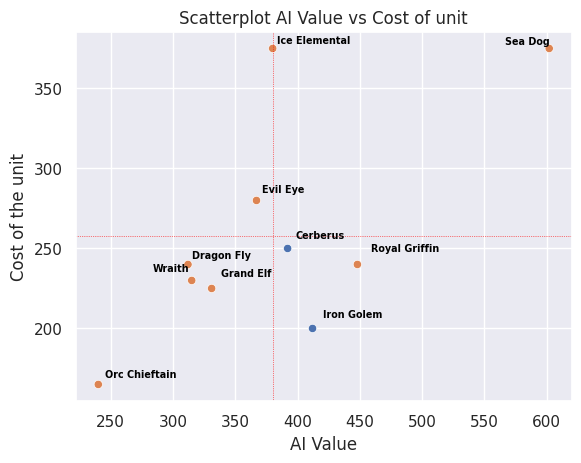

In [31]:
sns.set_theme()
sns.scatterplot(data = dftest2, x = 'Val', y = 'Cost',  hue = 'range_fly', legend = False)
# fit_reg=True
text_objects = []

for line in range(0,dftest2.shape[0]):
     text_objects.append(plt.text(dftest2.Val[line] + 1, dftest2.Cost[line] + 1, dftest2.Name[line],
              horizontalalignment='left',
              verticalalignment='top',
              size='xx-small',
              color='black',
              weight='semibold'))
     adjust_text(text_objects)

plt.xlabel("AI Value")
plt.ylabel("Cost of the unit")
plt.title('Scatterplot AI Value vs Cost of unit')

plt.axhline(y=avg_price, color="red", ls= ":", lw = 0.5)
plt.axvline(x=avg_val, color="red", linestyle=":", lw = 0.5)

In [32]:
dftest[dftest['Upgraded'] == 1].groupby('Town')['val_per_gold'].sum().sort_values(ascending = True).plot(kind = 'barh', title = 'Sum of all units of a Town taken as 1 at cost')

KeyError: ignored

In [ ]:
dftest[dftest['Upgraded'] == 1].groupby('Town')['total_val_per_gold'].sum().sort_values(ascending = True).plot(kind = 'barh', title = 'Value per one week dwelling/gold')

In [ ]:
dftest[dftest['Upgraded'] == 1].groupby('Town')['val_per_gold'].sum().sort_values(ascending = True).plot(kind = 'barh')

In [ ]:
dftest[dftest['Level'] == 5.5].sort_values(by = 'total_value', axis = 0, ascending = False).head(28)

In [ ]:
df[df['Level'] == 7.5].sort_values(by = 'diff_', axis = 0, ascending = False).head(28)

In [ ]:
df.groupby('Town')['diff_'].sum().sort_values(ascending = True).plot(kind = 'barh')

In [ ]:
df[df['Level']==6.5][['Name', 'dmg']].sort_values(by = 'dmg' ,ascending = False)

In [ ]:
n=0.5 + 4

ss = df[df['Level']==n][['Name', 'AI Value', 'diff_','Spd']].sort_values(by = 'Spd' ,ascending = False)
scaler = StandardScaler()
ss_scaled = scaler.fit_transform(ss[['Spd']])
ss['scaled'] = ss_scaled
ss.sort_values(by='scaled', ascending=False)

In [ ]:
df[((df['Level']/0.5) % 2 == 1) & (df['Level'] < 86)].groupby('Town')['Spd'].sum().sort_values(ascending=True).plot(kind = 'barh',figsize = (8,4))

In [ ]:
df.head()

In [ ]:
#CASTLES COSTS

# url1 = 'https://heroes.thelazy.net/index.php/Cove'
# df_resource1 = pd.read_html(url1)
# df_resource2 = df_resource1[1]
# resource = ['gold', 'wood', 'ore', 'crystal', 'gem', 'sulfur', 'mercury', 'troop cost']
# df_resource2['Resource'] = resource
# df_resource2